# CÓDIGO PARA EL PROCESADO DE DATOS REGIONALES
## Pendientes
- Calcular la densidad poblacional de la región
- Computar una metrica que vincule la densidad poblacional, los indices de marginación para buscar las AGEBS con el mayor grado de vulnerabilidad.

## 1.- Importar librerias

In [1]:
!pip install --upgrade xlrd
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 524 kB/s 
     |████████████████████████████████| 6.3 MB 32.3 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
import numpy as np
import os, glob

In [4]:
os.chdir("/content/drive/MyDrive/PRONACES/python")

## Filtrar IML

In [5]:
iml = pd.read_excel('data/IML_2020.xls', sheet_name="IML_2020_AGS-MEX")
iml.head()

,CVE_LOC,ENT,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,OVHAC,OVSREF,IM_2020,GM_2020,IMN_2020
0,10010001,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,863893,1.429924,19.164819,0.014187,0.079425,0.129197,0.453217,14.467772,3.531760,24.962292,Muy bajo,0.953435
1,10010096,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,41,6.451613,51.612903,7.317073,0.000000,29.268293,0.000000,14.634146,4.878049,22.654901,Bajo,0.865304
2,10010106,1,Aguascalientes,1,Aguascalientes,106,Arellano,1169,7.076566,39.095128,0.855432,0.000000,0.598802,0.769889,26.005133,7.869974,23.537698,Muy bajo,0.899022
3,10010112,1,Aguascalientes,1,Aguascalientes,112,Bajío los Vázquez,41,10.344828,65.517241,0.000000,0.000000,0.000000,0.000000,12.195122,0.000000,23.291531,Muy bajo,0.889620
4,10010120,1,Aguascalientes,1,Aguascalientes,120,Buenavista de Peñuelas,1054,6.420765,35.655738,0.475285,0.095057,0.380228,0.380228,26.425856,5.038023,23.776433,Muy bajo,0.908141


In [6]:
imlColima = iml.query("ENT == 6")
imlColima

,CVE_LOC,ENT,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,OVHAC,OVSREF,IM_2020,GM_2020,IMN_2020
5146,60010001,6,Colima,1,Armería,1,Ciudad de Armería,15368,5.833478,40.809731,0.379755,0.386303,0.792248,5.184943,30.599018,6.442742,23.330805,Muy bajo,0.891120
5147,60010003,6,Colima,1,Armería,3,El Banco de Jicotán,8,14.285714,71.428571,0.000000,0.000000,0.000000,12.500000,62.500000,0.000000,21.040908,Medio,0.803658
5148,60010007,6,Colima,1,Armería,7,Cofradía de Juárez,3776,9.394495,52.483150,1.297669,0.344280,1.456568,2.860169,30.693856,10.328390,22.688411,Bajo,0.866584
5149,60010009,6,Colima,1,Armería,9,Cuyutlán,1006,6.683805,44.215938,0.103734,0.000000,2.593361,9.336100,35.892116,7.572614,22.846229,Bajo,0.872612
5150,60010032,6,Colima,1,Armería,32,El Paraíso [Balneario],171,6.818182,48.484848,0.000000,0.000000,2.985075,21.641791,26.865672,12.686567,22.476395,Bajo,0.858486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,60100235,6,Colima,10,Villa de Álvarez,235,Jaboncillo,18,8.333333,41.666667,0.000000,100.000000,50.000000,11.111111,88.888889,100.000000,14.068461,Muy alto,0.537345
5426,60100274,6,Colima,10,Villa de Álvarez,274,Jardines del Bosque [Fraccionamiento],14,0.000000,41.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.916962,Muy bajo,0.951703
5427,60100301,6,Colima,10,Villa de Álvarez,301,Residencial Campestre Buenos Aires [Fraccionam...,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,25.426198,Muy bajo,0.971154
5428,60100302,6,Colima,10,Villa de Álvarez,302,Puente de Ladrillo,37,4.000000,36.000000,10.810811,10.810811,10.810811,8.108108,18.918919,10.810811,22.768036,Bajo,0.869625


## Filtrar IMU

In [7]:
imu = pd.read_excel('data/IMU_2020.xls', sheet_name="IMU_2020")
imu.drop(columns=["CVE_AGEB"], inplace=True)
imu.head()

,ENT,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,POB_TOTAL,P6A14NAE,SBASC,...,OVSEE,OVSAE,OVPT,OVSREF,OVSINT,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,2237,13.076923,22.976680,...,0.357942,0.0,0.089485,19.239374,71.543624,3.445190,32.035794,119.325886,Medio,0.932129
1,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,006A,1411,0.800000,5.203406,...,0.000000,0.0,0.000000,0.000000,2.763997,0.566974,2.055280,125.820757,Muy bajo,0.982865
2,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0106,2962,3.157895,3.525488,...,0.000000,0.0,0.135318,0.371496,17.223911,0.810537,5.538669,125.749891,Muy bajo,0.982311
3,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0163,2698,2.788845,7.623049,...,0.000000,0.0,0.148478,1.890289,34.395849,1.000741,12.008895,125.074122,Muy bajo,0.977032
4,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0182,2218,1.759531,2.951192,...,0.000000,0.0,0.452489,0.226860,1.719457,0.271493,0.588235,126.020458,Muy bajo,0.984425


In [8]:
imuColima = imu.query("ENT == 6")
imuColima.reset_index(inplace=True, drop=True)
imuColima

,ENT,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,POB_TOTAL,P6A14NAE,SBASC,...,OVSEE,OVSAE,OVPT,OVSREF,OVSINT,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020
0,6,Colima,1,Armería,1,Ciudad de Armería,0081,1389,3.684211,39.243924,...,0.071994,0.431965,3.383729,5.399568,51.691865,11.375090,24.190065,121.088274,Medio,0.945896
1,6,Colima,1,Armería,1,Ciudad de Armería,0109,1856,9.246575,45.158960,...,0.108992,0.544959,2.885139,8.065395,66.757493,12.970027,35.982580,119.314038,Medio,0.932037
2,6,Colima,1,Armería,1,Ciudad de Armería,0147,1078,7.594937,43.656716,...,0.463822,0.371058,1.669759,6.029685,46.474954,7.235622,29.777365,120.527209,Medio,0.941513
3,6,Colima,1,Armería,1,Ciudad de Armería,0151,1671,5.128205,36.478384,...,0.901442,0.600962,2.944712,5.228365,58.353365,7.271635,23.918269,120.756817,Medio,0.943307
4,6,Colima,1,Armería,1,Ciudad de Armería,0166,1463,7.142857,47.703843,...,0.279330,1.536313,12.569832,6.843575,70.328901,12.988827,42.108939,117.835723,Alto,0.920488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,6,Colima,10,Villa de Álvarez,1,Ciudad de Villa de Álvarez,1341,945,2.453988,13.803681,...,0.000000,0.000000,0.853789,3.628602,30.629669,1.814301,5.442903,124.022572,Muy bajo,0.968818
495,6,Colima,10,Villa de Álvarez,1,Ciudad de Villa de Álvarez,1356,255,6.666667,7.142857,...,0.000000,0.000000,0.790514,0.000000,1.976285,0.395257,1.185771,125.178116,Muy bajo,0.977845
496,6,Colima,10,Villa de Álvarez,1,Ciudad de Villa de Álvarez,1360,414,1.298701,9.859155,...,0.000000,0.000000,0.000000,3.381643,21.739130,1.207729,12.318841,125.022122,Muy bajo,0.976626
497,6,Colima,10,Villa de Álvarez,1,Ciudad de Villa de Álvarez,1375,1878,2.058824,16.523101,...,0.053248,0.000000,0.000000,5.111821,23.748669,1.064963,17.571885,123.804881,Muy bajo,0.967117


## GeoColima

In [9]:
os.listdir("data/geodata")

['06a.cpg',
 '06a.prj',
 '06a.dbf',
 '06a.shx',
 '06sip.cpg',
 '06sip.prj',
 '06sip.shx',
 '06sip.shp',
 '06a.shp',
 '06sip.dbf']

In [10]:
agebs = gpd.read_file("data/geodata/06a.shp")
#agebs.drop(columns=["CVEGEO","CVE_ENT","CVE_MUN","CVE_LOC"], inplace=True)
agebs.rename(columns={"CVE_AGEB":"AGEB"}, inplace=True)
agebs.sort_values("AGEB", inplace=True, ignore_index=True)
agebs

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,AGEB,geometry
0,0600700440013,06,007,0044,0013,"POLYGON ((2262188.548 794378.082, 2262331.417 ..."
1,0601000010019,06,010,0001,0019,"POLYGON ((2312768.278 808753.334, 2312910.247 ..."
2,0600200010021,06,002,0001,0021,"POLYGON ((2321869.250 806149.642, 2321862.311 ..."
3,0600700440028,06,007,0044,0028,"POLYGON ((2262276.958 793701.710, 2262241.413 ..."
4,0600500180038,06,005,0018,0038,"POLYGON ((2335418.685 822464.041, 2335379.410 ..."
...,...,...,...,...,...,...
546,0600700011863,06,007,0001,1863,"POLYGON ((2254895.552 797665.547, 2254956.262 ..."
547,0600700011878,06,007,0001,1878,"POLYGON ((2261069.535 790647.130, 2261106.307 ..."
548,0600700011882,06,007,0001,1882,"POLYGON ((2256963.299 792902.106, 2256958.413 ..."
549,0600700011897,06,007,0001,1897,"POLYGON ((2253757.730 799437.112, 2253757.073 ..."


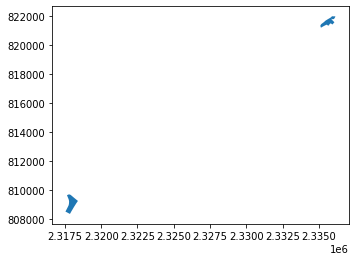

In [11]:
agebs[agebs.AGEB == '0095'].plot()

In [12]:
imuAgebs = imuColima.merge(agebs, on="AGEB", how="right")
imuAgebs = gpd.GeoDataFrame(imuAgebs)
imuAgebs

,ENT,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,POB_TOTAL,P6A14NAE,SBASC,...,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,geometry
0,6.0,Colima,7.0,Manzanillo,44.0,Jalipa,0013,693.0,5.607477,32.495164,...,4.040404,29.581530,120.376166,Medio,0.940333,0600700440013,06,007,0044,"POLYGON ((2262188.548 794378.082, 2262331.417 ..."
1,NaN,NaN,NaN,NaN,NaN,NaN,0019,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0601000010019,06,010,0001,"POLYGON ((2312768.278 808753.334, 2312910.247 ..."
2,6.0,Colima,2.0,Colima,1.0,Colima,0021,1637.0,6.493506,21.711457,...,5.951643,7.997520,123.161328,Bajo,0.962090,0600200010021,06,002,0001,"POLYGON ((2321869.250 806149.642, 2321862.311 ..."
3,6.0,Colima,7.0,Manzanillo,44.0,Jalipa,0028,482.0,4.166667,30.978261,...,4.184100,22.384937,121.655003,Bajo,0.950323,0600700440028,06,007,0044,"POLYGON ((2262276.958 793701.710, 2262241.413 ..."
4,6.0,Colima,5.0,Cuauhtémoc,18.0,Quesería,0038,3341.0,5.273834,35.626730,...,9.948749,23.863978,120.816434,Medio,0.943773,0600500180038,06,005,0018,"POLYGON ((2335418.685 822464.041, 2335379.410 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,6.0,Colima,7.0,Manzanillo,1.0,Manzanillo,1863,370.0,0.000000,5.223881,...,0.000000,13.783784,126.191406,Muy bajo,0.985760,0600700011863,06,007,0001,"POLYGON ((2254895.552 797665.547, 2254956.262 ..."
569,NaN,NaN,NaN,NaN,NaN,NaN,1878,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0600700011878,06,007,0001,"POLYGON ((2261069.535 790647.130, 2261106.307 ..."
570,NaN,NaN,NaN,NaN,NaN,NaN,1882,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0600700011882,06,007,0001,"POLYGON ((2256963.299 792902.106, 2256958.413 ..."
571,6.0,Colima,7.0,Manzanillo,1.0,Manzanillo,1897,5705.0,8.268482,24.001038,...,3.470640,15.092025,121.856029,Bajo,0.951894,0600700011897,06,007,0001,"POLYGON ((2253757.730 799437.112, 2253757.073 ..."


In [13]:
os.listdir("../ArchivosLimpios")

['QGIS',
 'puntosEscuelasSalud.gpkg',
 'imuAGEBS.gpkg',
 'zonasContaminantes.gpkg']

In [14]:
imuAgebs.to_file("../ArchivosLimpios/imuAGEBS.gpkg", driver="GPKG")

# AGEBS Contaminadas

In [15]:
quimicos = glob.glob("data/*v1.csv")
quimicos

['data/CO_v1.csv',
 'data/HCHO_v1.csv',
 'data/NO2_v1.csv',
 'data/O3_v1.csv',
 'data/S02_v1.csv']

In [16]:
imuColima.rename(columns={"AGEB":"CVE_AGEB"},inplace=True)
imuColima

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ENT,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,CVE_AGEB,POB_TOTAL,P6A14NAE,SBASC,...,OVSEE,OVSAE,OVPT,OVSREF,OVSINT,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020
0,6,Colima,1,Armería,1,Ciudad de Armería,0081,1389,3.684211,39.243924,...,0.071994,0.431965,3.383729,5.399568,51.691865,11.375090,24.190065,121.088274,Medio,0.945896
1,6,Colima,1,Armería,1,Ciudad de Armería,0109,1856,9.246575,45.158960,...,0.108992,0.544959,2.885139,8.065395,66.757493,12.970027,35.982580,119.314038,Medio,0.932037
2,6,Colima,1,Armería,1,Ciudad de Armería,0147,1078,7.594937,43.656716,...,0.463822,0.371058,1.669759,6.029685,46.474954,7.235622,29.777365,120.527209,Medio,0.941513
3,6,Colima,1,Armería,1,Ciudad de Armería,0151,1671,5.128205,36.478384,...,0.901442,0.600962,2.944712,5.228365,58.353365,7.271635,23.918269,120.756817,Medio,0.943307
4,6,Colima,1,Armería,1,Ciudad de Armería,0166,1463,7.142857,47.703843,...,0.279330,1.536313,12.569832,6.843575,70.328901,12.988827,42.108939,117.835723,Alto,0.920488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,6,Colima,10,Villa de Álvarez,1,Ciudad de Villa de Álvarez,1341,945,2.453988,13.803681,...,0.000000,0.000000,0.853789,3.628602,30.629669,1.814301,5.442903,124.022572,Muy bajo,0.968818
495,6,Colima,10,Villa de Álvarez,1,Ciudad de Villa de Álvarez,1356,255,6.666667,7.142857,...,0.000000,0.000000,0.790514,0.000000,1.976285,0.395257,1.185771,125.178116,Muy bajo,0.977845
496,6,Colima,10,Villa de Álvarez,1,Ciudad de Villa de Álvarez,1360,414,1.298701,9.859155,...,0.000000,0.000000,0.000000,3.381643,21.739130,1.207729,12.318841,125.022122,Muy bajo,0.976626
497,6,Colima,10,Villa de Álvarez,1,Ciudad de Villa de Álvarez,1375,1878,2.058824,16.523101,...,0.053248,0.000000,0.000000,5.111821,23.748669,1.064963,17.571885,123.804881,Muy bajo,0.967117


In [17]:
dfQuimicos = pd.read_csv(quimicos[0])
dfQuimicos.drop(columns=["system:index",".geo", "CVEGEO"], inplace=True)
dfQuimicos.rename(columns={"mean":quimicos[0].split("_")[0].split("/")[1]}, inplace=True)
dfQuimicos

for f in quimicos[1:]:
  
  df = pd.read_csv(f)
  df.drop(columns=["system:index",".geo", "CVEGEO","CVE_ENT","CVE_LOC","CVE_MUN"], inplace=True)
  qName = f.split("_")[0].split("/")[1]
  df.rename(columns={"mean":qName}, inplace=True)
  dfQuimicos = dfQuimicos.merge(df, on="CVE_AGEB", how="inner")


dfQuimicos.drop_duplicates(subset=["CVE_AGEB","CVE_ENT","CVE_LOC","CVE_MUN"], inplace=True)
dfQuimicos.head()

,CVE_AGEB,CVE_ENT,CVE_LOC,CVE_MUN,CO,HCHO,NO2,O3,S02
0,0081,6,1,1,0.031900,0.000176,0.000057,0.120404,0.000072
1,019A,6,1,1,0.031906,0.000176,0.000057,0.120404,0.000072
2,0359,6,1,1,0.031764,0.000176,0.000057,0.120415,0.000075
3,0151,6,1,1,0.031883,0.000176,0.000057,0.120406,0.000073
4,0166,6,1,1,0.031997,0.000175,0.000057,0.120406,0.000074


In [18]:
# normalize column of dataframe
def normalize(df, column):
  x = df[column].values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
  df[column] = x_scaled
  return df

for col in ["O3","HCHO","S02","NO2","CO"]:
  dfQuimicos = normalize(dfQuimicos, col)
dfQuimicos.head()

# OE*0.3       # CO * 1

,CVE_AGEB,CVE_ENT,CVE_LOC,CVE_MUN,CO,HCHO,NO2,O3,S02
0,0081,6,1,1,0.920731,0.589159,0.168652,0.958503,0.383725
1,019A,6,1,1,0.922224,0.592964,0.169937,0.958712,0.383487
2,0359,6,1,1,0.885408,0.590155,0.173562,0.969731,0.417955
3,0151,6,1,1,0.916349,0.599281,0.172558,0.960814,0.393501
4,0166,6,1,1,0.945915,0.577346,0.175845,0.960110,0.401157


In [19]:
dfQuimicos.describe()

,CVE_ENT,CVE_LOC,CVE_MUN,CO,HCHO,NO2,O3,S02
count,551.0,551.000000,551.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,6.0,3.361162,6.308530,0.765755,0.579221,0.476464,0.662108,0.516081
std,0.0,9.681391,3.141959,0.167123,0.224739,0.223075,0.243120,0.149295
min,6.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.0,1.000000,2.000000,0.727935,0.402169,0.316631,0.448402,0.407103
50%,6.0,1.000000,7.000000,0.771762,0.550076,0.506343,0.647009,0.499787
75%,6.0,1.000000,9.000000,0.888428,0.796870,0.628263,0.892310,0.604086
max,6.0,80.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
dfQuimicos["acumulado"] = dfQuimicos[["O3","HCHO","S02","NO2","CO"]].sum(axis=1)
dfQuimicos.head()

,CVE_AGEB,CVE_ENT,CVE_LOC,CVE_MUN,CO,HCHO,NO2,O3,S02,acumulado
0,0081,6,1,1,0.920731,0.589159,0.168652,0.958503,0.383725,3.020771
1,019A,6,1,1,0.922224,0.592964,0.169937,0.958712,0.383487,3.027323
2,0359,6,1,1,0.885408,0.590155,0.173562,0.969731,0.417955,3.036811
3,0151,6,1,1,0.916349,0.599281,0.172558,0.960814,0.393501,3.042502
4,0166,6,1,1,0.945915,0.577346,0.175845,0.960110,0.401157,3.060374


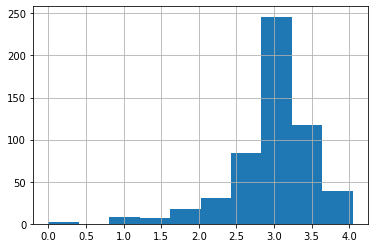

In [21]:
dfQuimicos["acumulado"].hist()

## Merge with IMU

In [22]:
dfQuimicos.rename(columns={
    "CVE_ENT":"ENT",
    "CVE_LOC":"LOC",
    "CVE_MUN":"MUN",
    "CVE_AGEB":"AGEB"
    }, inplace=True)

imuColima.rename(columns={
    "CVE_AGEB":"AGEB"
    }, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
print(imuColima.columns)
imuColima.head()

Index(['ENT', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'AGEB',
       'POB_TOTAL', 'P6A14NAE', 'SBASC', 'PSDSS', 'OVSDE', 'OVSEE', 'OVSAE',
       'OVPT', 'OVSREF', 'OVSINT', 'OVSCEL', 'OVHAC', 'IM_2020', 'GM_2020',
       'IMN_2020'],
      dtype='object')


,ENT,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,POB_TOTAL,P6A14NAE,SBASC,...,OVSEE,OVSAE,OVPT,OVSREF,OVSINT,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020
0,6,Colima,1,Armería,1,Ciudad de Armería,0081,1389,3.684211,39.243924,...,0.071994,0.431965,3.383729,5.399568,51.691865,11.375090,24.190065,121.088274,Medio,0.945896
1,6,Colima,1,Armería,1,Ciudad de Armería,0109,1856,9.246575,45.158960,...,0.108992,0.544959,2.885139,8.065395,66.757493,12.970027,35.982580,119.314038,Medio,0.932037
2,6,Colima,1,Armería,1,Ciudad de Armería,0147,1078,7.594937,43.656716,...,0.463822,0.371058,1.669759,6.029685,46.474954,7.235622,29.777365,120.527209,Medio,0.941513
3,6,Colima,1,Armería,1,Ciudad de Armería,0151,1671,5.128205,36.478384,...,0.901442,0.600962,2.944712,5.228365,58.353365,7.271635,23.918269,120.756817,Medio,0.943307
4,6,Colima,1,Armería,1,Ciudad de Armería,0166,1463,7.142857,47.703843,...,0.279330,1.536313,12.569832,6.843575,70.328901,12.988827,42.108939,117.835723,Alto,0.920488


In [24]:
print(dfQuimicos.columns)
dfQuimicos.head()

Index(['AGEB', 'ENT', 'LOC', 'MUN', 'CO', 'HCHO', 'NO2', 'O3', 'S02',
       'acumulado'],
      dtype='object')


,AGEB,ENT,LOC,MUN,CO,HCHO,NO2,O3,S02,acumulado
0,0081,6,1,1,0.920731,0.589159,0.168652,0.958503,0.383725,3.020771
1,019A,6,1,1,0.922224,0.592964,0.169937,0.958712,0.383487,3.027323
2,0359,6,1,1,0.885408,0.590155,0.173562,0.969731,0.417955,3.036811
3,0151,6,1,1,0.916349,0.599281,0.172558,0.960814,0.393501,3.042502
4,0166,6,1,1,0.945915,0.577346,0.175845,0.960110,0.401157,3.060374


In [25]:
dfQuimicosIMU = dfQuimicos.merge(imuColima, on=["AGEB","ENT","LOC","MUN"])
dfQuimicosIMU

,AGEB,ENT,LOC,MUN,CO,HCHO,NO2,O3,S02,acumulado,...,OVSEE,OVSAE,OVPT,OVSREF,OVSINT,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020
0,0081,6,1,1,0.920731,0.589159,0.168652,0.958503,0.383725,3.020771,...,0.071994,0.431965,3.383729,5.399568,51.691865,11.375090,24.190065,121.088274,Medio,0.945896
1,019A,6,1,1,0.922224,0.592964,0.169937,0.958712,0.383487,3.027323,...,0.337458,0.337458,2.474691,3.937008,55.230596,4.161980,26.546682,121.130728,Medio,0.946228
2,0359,6,1,1,0.885408,0.590155,0.173562,0.969731,0.417955,3.036811,...,0.488998,0.122249,1.589242,4.767726,59.413203,3.178484,23.227384,122.336721,Bajo,0.955649
3,0151,6,1,1,0.916349,0.599281,0.172558,0.960814,0.393501,3.042502,...,0.901442,0.600962,2.944712,5.228365,58.353365,7.271635,23.918269,120.756817,Medio,0.943307
4,0166,6,1,1,0.945915,0.577346,0.175845,0.960110,0.401157,3.060374,...,0.279330,1.536313,12.569832,6.843575,70.328901,12.988827,42.108939,117.835723,Alto,0.920488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1017,6,1,10,0.668468,0.719600,0.638531,0.461364,0.522927,3.010891,...,0.000000,0.000000,0.350467,0.000000,0.934579,0.233645,7.593458,125.420828,Muy bajo,0.979740
495,1178,6,1,10,0.659367,0.638317,0.606190,0.518195,0.407103,2.829171,...,0.000000,0.000000,0.000000,0.173310,19.410745,1.559792,10.398614,125.694471,Muy bajo,0.981878
496,1144,6,1,10,0.710395,0.776928,0.559950,0.602069,0.502953,3.152296,...,0.000000,0.000000,0.149309,1.530422,16.610676,1.119821,9.369168,125.431737,Muy bajo,0.979826
497,113A,6,1,10,0.754125,0.867223,0.584007,0.622716,0.558021,3.386093,...,0.000000,0.000000,0.000000,2.334063,18.599562,0.437637,9.190372,125.583650,Muy bajo,0.981012


## Merge geodata

In [26]:
agebs = gpd.read_file("data/geodata/06a.shp")
agebs.drop(columns=["CVEGEO"], inplace=True)
agebs.rename(columns={
    "CVE_ENT":"ENT",
    "CVE_MUN":"MUN",
    "CVE_LOC":"LOC",
    "CVE_AGEB":"AGEB"
    },inplace=True)

agebs[["ENT","MUN","LOC"]] = agebs[["ENT","MUN","LOC"]].astype(int)
agebs

,ENT,MUN,LOC,AGEB,geometry
0,6,1,1,0081,"POLYGON ((2293464.136 773222.003, 2293464.942 ..."
1,6,1,1,019A,"POLYGON ((2293790.913 773288.458, 2293796.024 ..."
2,6,1,1,0359,"POLYGON ((2292728.301 773695.719, 2292723.607 ..."
3,6,1,1,0151,"POLYGON ((2293388.338 773721.118, 2293407.275 ..."
4,6,1,1,0166,"POLYGON ((2294660.453 773180.454, 2294661.055 ..."
...,...,...,...,...,...
546,6,10,1,1017,"POLYGON ((2319827.994 811244.081, 2319759.033 ..."
547,6,10,1,1178,"POLYGON ((2317403.972 811570.582, 2317381.354 ..."
548,6,10,1,1144,"POLYGON ((2315441.563 810543.627, 2315414.299 ..."
549,6,10,1,113A,"POLYGON ((2315467.707 808779.738, 2315450.836 ..."


In [27]:
zonesContaminantes = gpd.GeoDataFrame(dfQuimicosIMU.merge(agebs, on=["AGEB","ENT","LOC","MUN"], how="right"))
zonesContaminantes

,AGEB,ENT,LOC,MUN,CO,HCHO,NO2,O3,S02,acumulado,...,OVSAE,OVPT,OVSREF,OVSINT,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020,geometry
0,0081,6,1,1,0.920731,0.589159,0.168652,0.958503,0.383725,3.020771,...,0.431965,3.383729,5.399568,51.691865,11.375090,24.190065,121.088274,Medio,0.945896,"POLYGON ((2293464.136 773222.003, 2293464.942 ..."
1,019A,6,1,1,0.922224,0.592964,0.169937,0.958712,0.383487,3.027323,...,0.337458,2.474691,3.937008,55.230596,4.161980,26.546682,121.130728,Medio,0.946228,"POLYGON ((2293790.913 773288.458, 2293796.024 ..."
2,0359,6,1,1,0.885408,0.590155,0.173562,0.969731,0.417955,3.036811,...,0.122249,1.589242,4.767726,59.413203,3.178484,23.227384,122.336721,Bajo,0.955649,"POLYGON ((2292728.301 773695.719, 2292723.607 ..."
3,0151,6,1,1,0.916349,0.599281,0.172558,0.960814,0.393501,3.042502,...,0.600962,2.944712,5.228365,58.353365,7.271635,23.918269,120.756817,Medio,0.943307,"POLYGON ((2293388.338 773721.118, 2293407.275 ..."
4,0166,6,1,1,0.945915,0.577346,0.175845,0.960110,0.401157,3.060374,...,1.536313,12.569832,6.843575,70.328901,12.988827,42.108939,117.835723,Alto,0.920488,"POLYGON ((2294660.453 773180.454, 2294661.055 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1017,6,1,10,0.668468,0.719600,0.638531,0.461364,0.522927,3.010891,...,0.000000,0.350467,0.000000,0.934579,0.233645,7.593458,125.420828,Muy bajo,0.979740,"POLYGON ((2319827.994 811244.081, 2319759.033 ..."
547,1178,6,1,10,0.659367,0.638317,0.606190,0.518195,0.407103,2.829171,...,0.000000,0.000000,0.173310,19.410745,1.559792,10.398614,125.694471,Muy bajo,0.981878,"POLYGON ((2317403.972 811570.582, 2317381.354 ..."
548,1144,6,1,10,0.710395,0.776928,0.559950,0.602069,0.502953,3.152296,...,0.000000,0.149309,1.530422,16.610676,1.119821,9.369168,125.431737,Muy bajo,0.979826,"POLYGON ((2315441.563 810543.627, 2315414.299 ..."
549,113A,6,1,10,0.754125,0.867223,0.584007,0.622716,0.558021,3.386093,...,0.000000,0.000000,2.334063,18.599562,0.437637,9.190372,125.583650,Muy bajo,0.981012,"POLYGON ((2315467.707 808779.738, 2315450.836 ..."


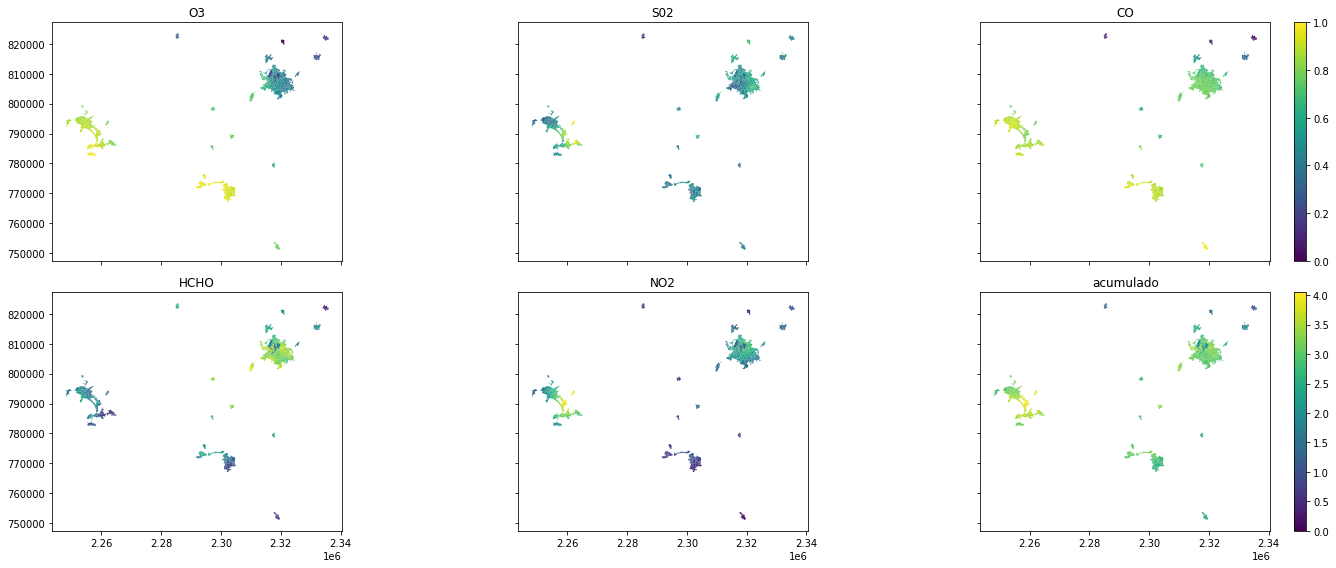

In [28]:
ncols = 3
nrows = 2

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 8), sharex=True, sharey=True)

cols = ["O3","HCHO","S02","NO2","CO", "acumulado"]

contador = 0
for col in range(ncols):
  for row in range(nrows):

    ax[row, col].set_title(cols[contador])
    if col == 2:
      zonesContaminantes.plot(column=cols[contador], legend=True, ax=ax[row, col])
    else:
      zonesContaminantes.plot(column=cols[contador], legend=False, ax=ax[row, col])

    contador += 1

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.8,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.2)

plt.tight_layout()
plt.show()

In [29]:
zonesContaminantes.crs

<Projected CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DA ...>
Name: MEXICO_ITRF_2008_LCC
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
#zonesContaminantes.to_file("../ArchivosLimpios/zonasContaminantes.gpkg", driver="GPKG")

## Generación de reportes

In [31]:
zonesContaminantes.head(2)

,AGEB,ENT,LOC,MUN,CO,HCHO,NO2,O3,S02,acumulado,...,OVSAE,OVPT,OVSREF,OVSINT,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020,geometry
0,0081,6,1,1,0.920731,0.589159,0.168652,0.958503,0.383725,3.020771,...,0.431965,3.383729,5.399568,51.691865,11.37509,24.190065,121.088274,Medio,0.945896,"POLYGON ((2293464.136 773222.003, 2293464.942 ..."
1,019A,6,1,1,0.922224,0.592964,0.169937,0.958712,0.383487,3.027323,...,0.337458,2.474691,3.937008,55.230596,4.16198,26.546682,121.130728,Medio,0.946228,"POLYGON ((2293790.913 773288.458, 2293796.024 ..."


In [32]:
zonesContaminantes["area"] = zonesContaminantes.geometry.area / 10**4
zonesContaminantes["area"].head()



0    28.249279
1    15.053164
2     5.390087
3    41.861252
4    40.363260
Name: area, dtype: float64

In [33]:
# Densidad poblacional por cada km^2
zonesContaminantes["densidad"] = zonesContaminantes["POB_TOTAL"] / zonesContaminantes["area"]
zonesContaminantes["densidad"]

0       49.169397
1       59.057351
2      151.760066
3       39.917583
4       36.245834
          ...    
546     41.360694
547     68.889999
548     68.939899
549     43.875041
550     86.419435
Name: densidad, Length: 551, dtype: float64

In [34]:
zonesContaminantes["factor"] = zonesContaminantes["densidad"] * zonesContaminantes["acumulado"]
zonesContaminantes["factor"]

0      148.529473
1      178.785688
2      460.866592
3      121.449338
4      110.925808
          ...    
546    124.532548
547    194.901588
548    217.318954
549    148.564953
550    295.589202
Name: factor, Length: 551, dtype: float64

In [35]:
zonesContaminantes.head(2)

,AGEB,ENT,LOC,MUN,CO,HCHO,NO2,O3,S02,acumulado,...,OVSINT,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020,geometry,area,densidad,factor
0,0081,6,1,1,0.920731,0.589159,0.168652,0.958503,0.383725,3.020771,...,51.691865,11.37509,24.190065,121.088274,Medio,0.945896,"POLYGON ((2293464.136 773222.003, 2293464.942 ...",28.249279,49.169397,148.529473
1,019A,6,1,1,0.922224,0.592964,0.169937,0.958712,0.383487,3.027323,...,55.230596,4.16198,26.546682,121.130728,Medio,0.946228,"POLYGON ((2293790.913 773288.458, 2293796.024 ...",15.053164,59.057351,178.785688


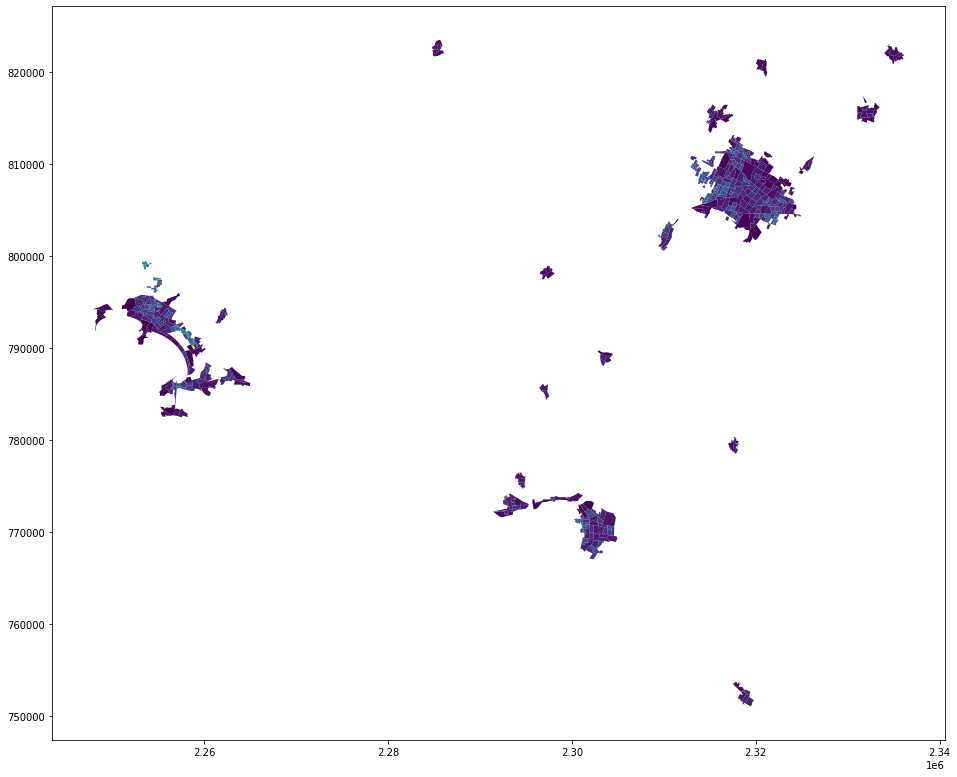

In [36]:
fig, ax = plt.subplots(figsize=(16,16))
zonesContaminantes.plot(column="factor", ax=ax)
plt.show()

In [37]:
zonesContaminantes.sort_values("factor", ascending=False, inplace=True)
zonesContaminantes.head()

,AGEB,ENT,LOC,MUN,CO,HCHO,NO2,O3,S02,acumulado,...,OVSINT,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020,geometry,area,densidad,factor
296,105A,6,1,7,0.813755,0.510085,0.933331,0.896253,0.788130,3.941553,...,28.311688,3.051948,13.961039,123.857370,Muy bajo,0.967527,"POLYGON ((2258770.382 790066.946, 2258731.273 ...",4.807400,320.547497,1263.455015
260,1083,6,1,7,0.879264,0.503594,0.829189,0.874525,0.709164,3.795735,...,12.582781,0.000000,1.986755,126.769859,Muy bajo,0.990279,"POLYGON ((2257677.422 792101.832, 2257660.132 ...",0.717090,210.573151,799.279913
237,1079,6,1,7,0.831056,0.457837,0.888858,0.889368,0.727309,3.794428,...,19.768992,4.264771,16.170591,122.770207,Bajo,0.959035,"POLYGON ((2258235.578 791582.658, 2258251.501 ...",13.797391,164.233953,623.173855
334,1897,6,1,7,0.697028,0.395680,0.397744,0.808557,0.718387,3.017397,...,68.115688,3.470640,15.092025,121.856029,Bajo,0.951894,"POLYGON ((2253757.730 799437.112, 2253757.073 ...",29.608992,192.677952,581.385894
338,1789,6,1,7,0.715762,0.350921,0.411010,0.805129,0.613468,2.896290,...,72.497966,1.627339,15.303215,121.246173,Bajo,0.947130,"POLYGON ((2253624.455 799134.829, 2253626.151 ...",12.437947,198.023037,573.532107


In [38]:
zonesContaminantes.set_index("AGEB", inplace=True)

In [39]:
listMuns = ['Manzanillo', 'Tecomán', 'Villa de Álvarez', 'Armería', 'Colima',
         'Cuauhtémoc', 'Minatitlán']
zonesContaminantes = zonesContaminantes[zonesContaminantes["NOM_MUN"].isin(listMuns)]


In [40]:
listMuns.sort()

In [41]:

zonesContaminantes.dropna(subset=["NOM_MUN"], inplace=True)
zonesContaminantes.columns

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Index(['ENT', 'LOC', 'MUN', 'CO', 'HCHO', 'NO2', 'O3', 'S02', 'acumulado',
       'NOM_ENT', 'NOM_MUN', 'NOM_LOC', 'POB_TOTAL', 'P6A14NAE', 'SBASC',
       'PSDSS', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'OVSREF', 'OVSINT',
       'OVSCEL', 'OVHAC', 'IM_2020', 'GM_2020', 'IMN_2020', 'geometry', 'area',
       'densidad', 'factor'],
      dtype='object')

### Generar subplots por Municipio

In [42]:
zonesContaminantes.head()

,ENT,LOC,MUN,CO,HCHO,NO2,O3,S02,acumulado,NOM_ENT,...,OVSINT,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020,geometry,area,densidad,factor
AGEB,,,,,,,,,,,,,,,,,,,,,
105A,6,1,7,0.813755,0.510085,0.933331,0.896253,0.788130,3.941553,Colima,...,28.311688,3.051948,13.961039,123.857370,Muy bajo,0.967527,"POLYGON ((2258770.382 790066.946, 2258731.273 ...",4.807400,320.547497,1263.455015
1083,6,1,7,0.879264,0.503594,0.829189,0.874525,0.709164,3.795735,Colima,...,12.582781,0.000000,1.986755,126.769859,Muy bajo,0.990279,"POLYGON ((2257677.422 792101.832, 2257660.132 ...",0.717090,210.573151,799.279913
1079,6,1,7,0.831056,0.457837,0.888858,0.889368,0.727309,3.794428,Colima,...,19.768992,4.264771,16.170591,122.770207,Bajo,0.959035,"POLYGON ((2258235.578 791582.658, 2258251.501 ...",13.797391,164.233953,623.173855
1897,6,1,7,0.697028,0.395680,0.397744,0.808557,0.718387,3.017397,Colima,...,68.115688,3.470640,15.092025,121.856029,Bajo,0.951894,"POLYGON ((2253757.730 799437.112, 2253757.073 ...",29.608992,192.677952,581.385894
1789,6,1,7,0.715762,0.350921,0.411010,0.805129,0.613468,2.896290,Colima,...,72.497966,1.627339,15.303215,121.246173,Bajo,0.947130,"POLYGON ((2253624.455 799134.829, 2253626.151 ...",12.437947,198.023037,573.532107


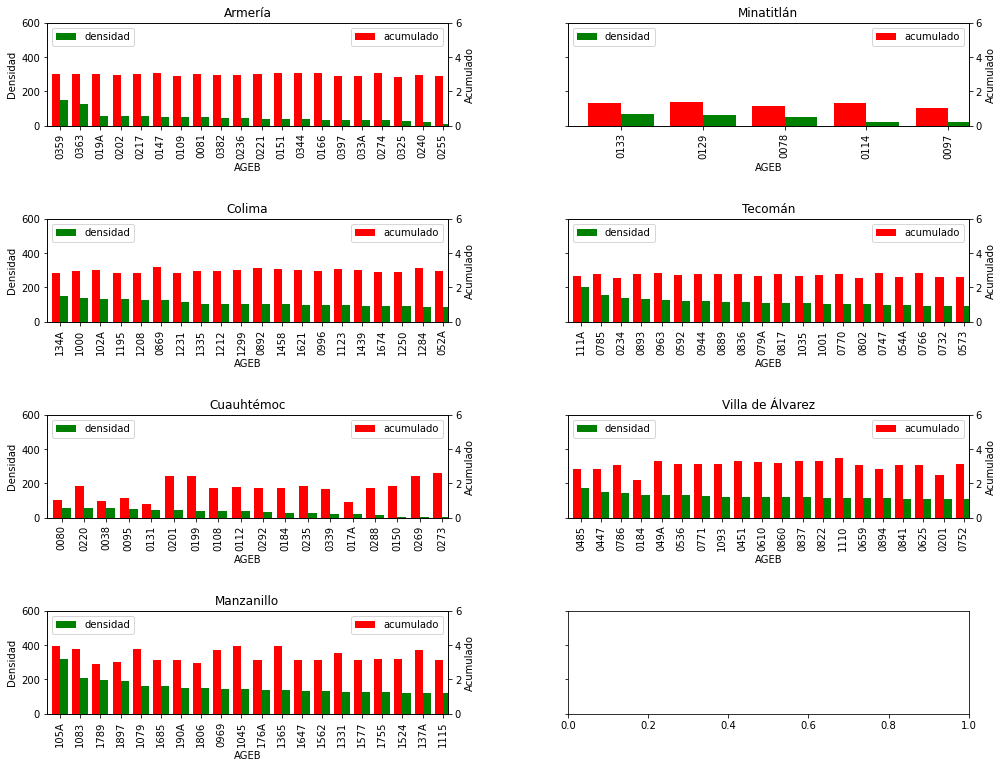

In [43]:
numMun = len(zonesContaminantes.NOM_MUN.unique())
nrows = 4
ncols = 2 

fig, ax = plt.subplots(nrows = nrows, ncols=ncols, figsize=(16,12), sharey=True)

i = 0
width = 0.4
for row in range(ncols):
  for col in range(nrows):
    if i > numMun-1:
      break
    df = zonesContaminantes[zonesContaminantes["NOM_MUN"] == listMuns[i]].copy()
    df.sort_values("densidad", ascending=False, inplace=True)
    df = df.head(20)

    ax2 = ax[col,row].twinx()

    ax2.set_ylim(0,6)
    ax[col,row].set_ylim(0,600)
    
    ax[col,row].set_title(listMuns[i])
    df.densidad.plot(kind='bar', color='green', ax=ax[col,row], width=width, position=0)
    ax[col,row].set_ylabel("Densidad (Pop/ha)")
    df.acumulado.plot(kind='bar', color='red', ax=ax2, width=width, position=1)

    ax[col,row].set_ylabel('Densidad')
    ax2.set_ylabel('Acumulado')

    ax[col,row].legend(loc='upper left')
    ax2.legend(loc='upper right')

    i+=1

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.9)

plt.show()

### Plot de selección

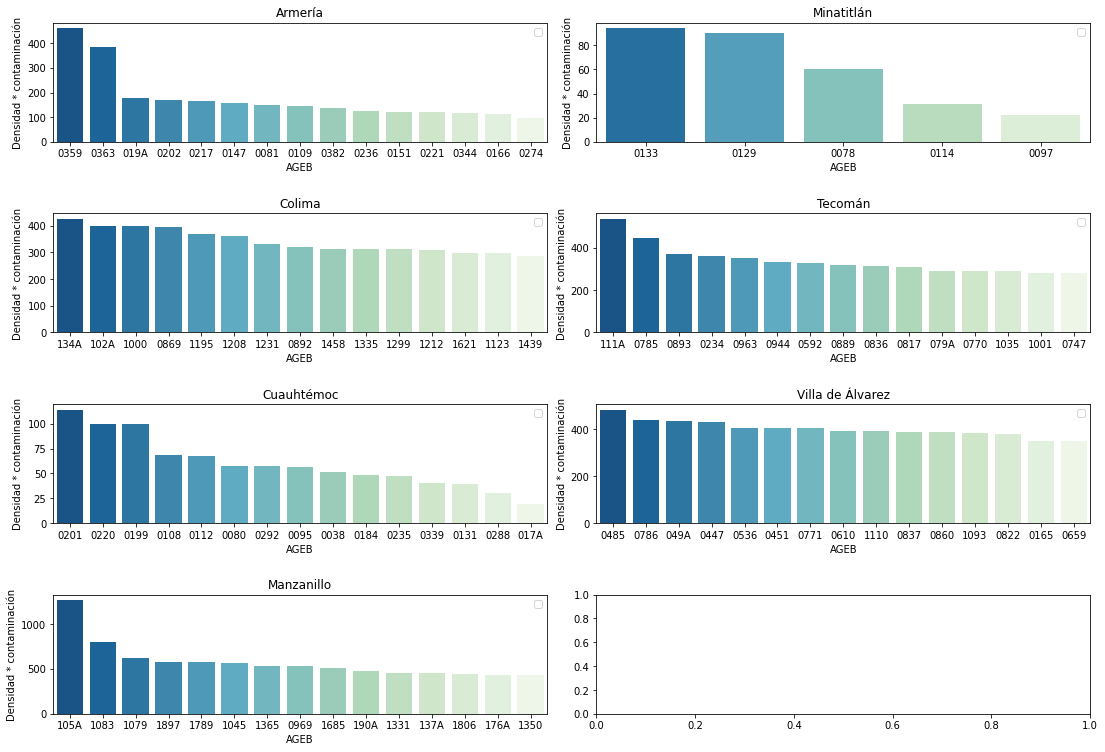

In [44]:
numMun = len(zonesContaminantes.NOM_MUN.unique())
nrows = 4
ncols = 2 

fig, ax = plt.subplots(nrows = nrows, ncols=ncols, figsize=(18,12))

i = 0
width = 0.4
for row in range(ncols):
  for col in range(nrows):
    if i > numMun-1:
      break
    df = zonesContaminantes[zonesContaminantes["NOM_MUN"] == listMuns[i]].copy()
    df.sort_values("factor", ascending=False, inplace=True)
    df = df.head(15)

    ax[col,row].set_title(listMuns[i])


    sns.barplot(
        x=df.index,
        y="factor", 
        data=df, 
        ax=ax[col,row], 
        palette = "GnBu_r",
        #hue="GM_2020"
        )

    ax[col,row].set_ylabel("Densidad * contaminación")
    ax[col,row].legend(loc='upper right', ncol=4)
    

    i+=1

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.6)

plt.show()

Comparativa:
- Historico de las AGEBS para analizar la evolución 
- Agregar las escuelas, centros medicos (puntos)
- Considerar la cercanía de los puntos a las AGEBS de interés

In [45]:
zonesContaminantes.columns

Index(['ENT', 'LOC', 'MUN', 'CO', 'HCHO', 'NO2', 'O3', 'S02', 'acumulado',
       'NOM_ENT', 'NOM_MUN', 'NOM_LOC', 'POB_TOTAL', 'P6A14NAE', 'SBASC',
       'PSDSS', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'OVSREF', 'OVSINT',
       'OVSCEL', 'OVHAC', 'IM_2020', 'GM_2020', 'IMN_2020', 'geometry', 'area',
       'densidad', 'factor'],
      dtype='object')

# Agrupar datos puntuales

In [46]:
os.listdir("data/geodata")

['06a.cpg',
 '06a.prj',
 '06a.dbf',
 '06a.shx',
 '06sip.cpg',
 '06sip.prj',
 '06sip.shx',
 '06sip.shp',
 '06a.shp',
 '06sip.dbf']

In [47]:
points = gpd.read_file("data/geodata/06sip.shp")
points

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,CONDICION,GEOGRAFICO,NOMSERV,TIPO,CVE_SERV,AMBITO,geometry
0,0600100010151010,06,001,0001,0151,010,No Aplica,Plaza,Ninguno,No Aplica,1,Urbana,POINT (2293496.888 773486.091)
1,0600100010151036,06,001,0001,0151,036,No Aplica,Plaza,Ninguno,No Aplica,1,Urbana,POINT (2293361.862 773595.127)
2,0600100010202022,06,001,0001,0202,022,No Aplica,Plaza,Ninguno,No Aplica,1,Urbana,POINT (2293553.288 772788.353)
3,0600100010109001,06,001,0001,0109,001,No Aplica,Plaza,Ninguno,No Aplica,1,Urbana,POINT (2293043.340 772204.457)
4,0600100010166050,06,001,0001,0166,050,No Aplica,Plaza,Ninguno,No Aplica,1,Urbana,POINT (2294666.964 773144.164)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,0601000010589041,06,010,0001,0589,041,En Operación,Infraestructura Urbana,Ninguno,Rampa para Silla de Ruedas,1,Urbana,POINT (2315159.991 808362.847)
3106,0601000010358055,06,010,0001,0358,055,En Operación,Infraestructura Urbana,Ninguno,Rampa para Silla de Ruedas,3,Urbana,POINT (2317363.887 809515.652)
3107,0601000010358055,06,010,0001,0358,055,En Operación,Infraestructura Urbana,Ninguno,Rampa para Silla de Ruedas,4,Urbana,POINT (2317404.413 809428.979)
3108,0601000010752002,06,010,0001,0752,002,En Operación,Escuela,Estatal Número 12,Secundaria,2,Urbana,POINT (2315159.434 806660.955)


In [48]:
points.GEOGRAFICO.unique()

array(['Plaza', 'Escuela', 'Templo', 'Centro de Asistencia Médica',
       'Instalación de Comunicación', 'Cementerio',
       'Instalación Gubernamental', 'Mercado', 'Pozo',
       'Instalación Deportiva o Recreativa', 'Tanque de Agua',
       'Infraestructura Urbana', 'Estacion de Transporte Terrestre',
       'Centro Comercial'], dtype=object)

In [49]:
listToKeep = [ 'Escuela', 'Centro de Asistencia Médica']

In [50]:
points = points[points['GEOGRAFICO'].isin(listToKeep)].copy()

In [51]:
#points.to_file("../ArchivosLimpios/puntosEscuelasSalud.gpkg", driver="GPKG")

## Points inside polygons

In [52]:
zonesContaminantes.reset_index(inplace=True)

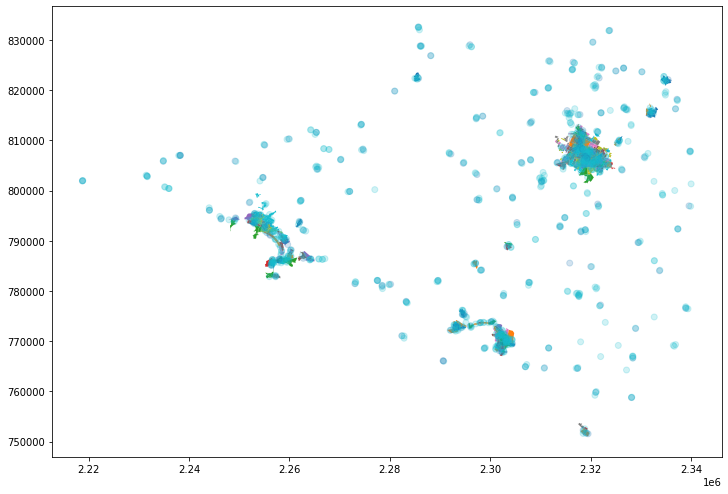

In [53]:
fig, ax = plt.subplots(figsize=(12,12))

zonesContaminantes.plot(column="AGEB",ax=ax)
points.plot(column="GEOGRAFICO", ax=ax, alpha=0.2)

plt.show()

In [54]:
pointsGrouped = points.groupby(by=["CVE_AGEB","GEOGRAFICO"], as_index=False).size()
pointsGrouped.rename(columns={"CVE_AGEB":"AGEB"},inplace=True)
pointsGrouped.head()

,AGEB,GEOGRAFICO,size
0,0010,Centro de Asistencia Médica,3
1,0010,Escuela,9
2,0011,Centro de Asistencia Médica,1
3,0011,Escuela,3
4,0014,Centro de Asistencia Médica,1


In [55]:
pointsGrouped = pointsGrouped.pivot_table(
    values="size", columns="GEOGRAFICO", index="AGEB"
    )
pointsGrouped.reset_index(inplace=True)

pointsGrouped.head()

GEOGRAFICO,AGEB,Centro de Asistencia Médica,Escuela
0,0010,3.0,9.0
1,0011,1.0,3.0
2,0014,1.0,3.0
3,0016,2.0,6.0
4,0018,1.0,4.0


In [56]:
zones = zonesContaminantes.merge(pointsGrouped, on="AGEB", how="left")
zones["Escuela"] = zones["Escuela"].fillna(0)
zones["Centro de Asistencia Médica"] = zones["Centro de Asistencia Médica"].fillna(0)
zones.head(2)

,AGEB,ENT,LOC,MUN,CO,HCHO,NO2,O3,S02,acumulado,...,OVHAC,IM_2020,GM_2020,IMN_2020,geometry,area,densidad,factor,Centro de Asistencia Médica,Escuela
0,105A,6,1,7,0.813755,0.510085,0.933331,0.896253,0.788130,3.941553,...,13.961039,123.857370,Muy bajo,0.967527,"POLYGON ((2258770.382 790066.946, 2258731.273 ...",4.80740,320.547497,1263.455015,0.0,0.0
1,1083,6,1,7,0.879264,0.503594,0.829189,0.874525,0.709164,3.795735,...,1.986755,126.769859,Muy bajo,0.990279,"POLYGON ((2257677.422 792101.832, 2257660.132 ...",0.71709,210.573151,799.279913,0.0,0.0


In [57]:
# 254 rows × 34 columns   inner

zones.describe()

,ENT,LOC,MUN,CO,HCHO,NO2,O3,S02,acumulado,POB_TOTAL,...,OVSINT,OVSCEL,OVHAC,IM_2020,IMN_2020,area,densidad,factor,Centro de Asistencia Médica,Escuela
count,471.0,471.000000,471.000000,470.000000,470.000000,470.000000,470.000000,470.000000,471.000000,471.000000,...,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,6.0,3.303609,6.492569,0.782897,0.577909,0.491470,0.672812,0.512192,3.030832,1322.199575,...,34.542099,5.261353,20.673866,122.011993,0.953112,30.892012,62.098066,188.906142,0.193206,1.099788
std,0.0,9.519698,3.207612,0.151810,0.228079,0.219635,0.239660,0.147023,0.516530,867.372559,...,21.483713,4.182743,12.322577,3.318682,0.025924,26.160061,41.464213,136.521549,0.532793,1.444218
min,6.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.148460,0.000000,0.000000,56.000000,...,0.000000,0.000000,0.000000,99.811749,0.779692,0.717090,0.704614,0.000000,0.000000,0.000000
25%,6.0,1.000000,2.000000,0.746036,0.393452,0.333470,0.461355,0.407103,2.867037,618.500000,...,18.281170,1.839456,10.716461,120.506512,0.941352,13.293759,31.040572,90.420092,0.000000,0.000000
50%,6.0,1.000000,7.000000,0.774602,0.551924,0.527888,0.651185,0.493818,3.081956,1288.000000,...,29.929577,4.413793,19.665907,122.546011,0.957283,24.623464,54.698252,167.917291,0.000000,1.000000
75%,6.0,1.000000,9.000000,0.890306,0.800129,0.633758,0.895909,0.602165,3.297375,1869.000000,...,48.388772,7.924042,29.577030,124.313968,0.971094,41.261649,87.729332,264.580235,0.000000,2.000000
max,6.0,80.000000,10.000000,1.000000,0.909500,0.991266,0.998211,1.000000,4.048250,5705.000000,...,97.744361,30.448128,68.421053,126.998328,0.992063,186.692533,320.547497,1263.455015,4.000000,7.000000


In [58]:
zones.to_file("../ArchivosLimpios/zonasContaminantes.gpkg", driver="GPKG")

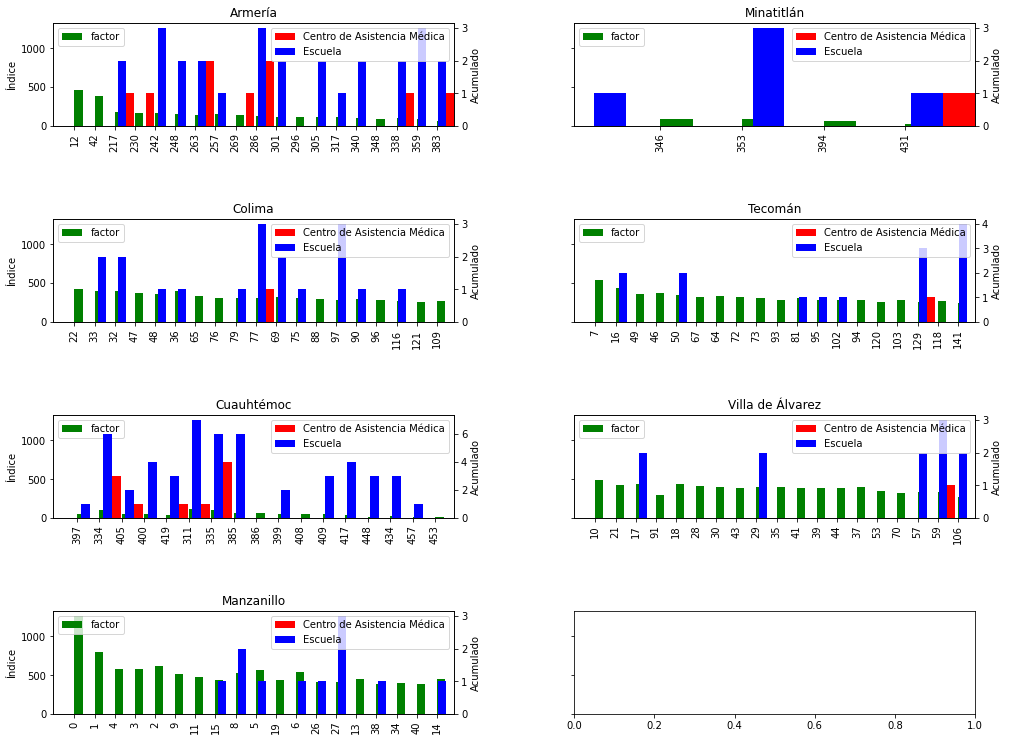

In [59]:
numMun = len(zonesContaminantes.NOM_MUN.unique())
nrows = 4
ncols = 2 

fig, ax = plt.subplots(nrows = nrows, ncols=ncols, figsize=(16,12), sharey=True)

i = 0
width = 0.4
for row in range(ncols):
  for col in range(nrows):
    if i > numMun-1:
      break
    df = zones[zones["NOM_MUN"] == listMuns[i]].copy()
    df.sort_values("densidad", ascending=False, inplace=True)
    df = df.head(20)

    # ax principal
    df.factor.plot(kind='bar', color='green', ax=ax[col,row], width=width, position=0)
    
    #ax[col,row].set_ylim(0,600)
    ax[col,row].set_title(listMuns[i])
    ax[col,row].set_ylabel("Índice")

    # ax secundario
    ax2 = ax[col,row].twinx()
    df["Centro de Asistencia Médica"].plot(kind='bar', color='red', ax=ax2, width=width, position=1)
    df["Escuela"].plot(kind='bar', color='blue', ax=ax2, width=width, position=2)

    #ax2.set_ylim(0,6)
    ax2.set_ylabel('Acumulado')
    ax[col,row].legend(loc='upper left')
    ax2.legend(loc='upper right')

    i+=1

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.9)

plt.show()

In [60]:
7*4/564

0.04964539007092199

In [61]:
zones["Índice"] = zones["factor"] * np.max(zones[["Centro de Asistencia Médica","Escuela"]]).max() / zones["factor"].max()

In [62]:
zonesBarplot = zones.melt(id_vars="AGEB", value_vars=["Índice","Centro de Asistencia Médica","Escuela"])
zonesBarplot.head(2)

,AGEB,variable,value
0,105A,Índice,7.000000
1,1083,Índice,4.428301


Manzanillo 3 0


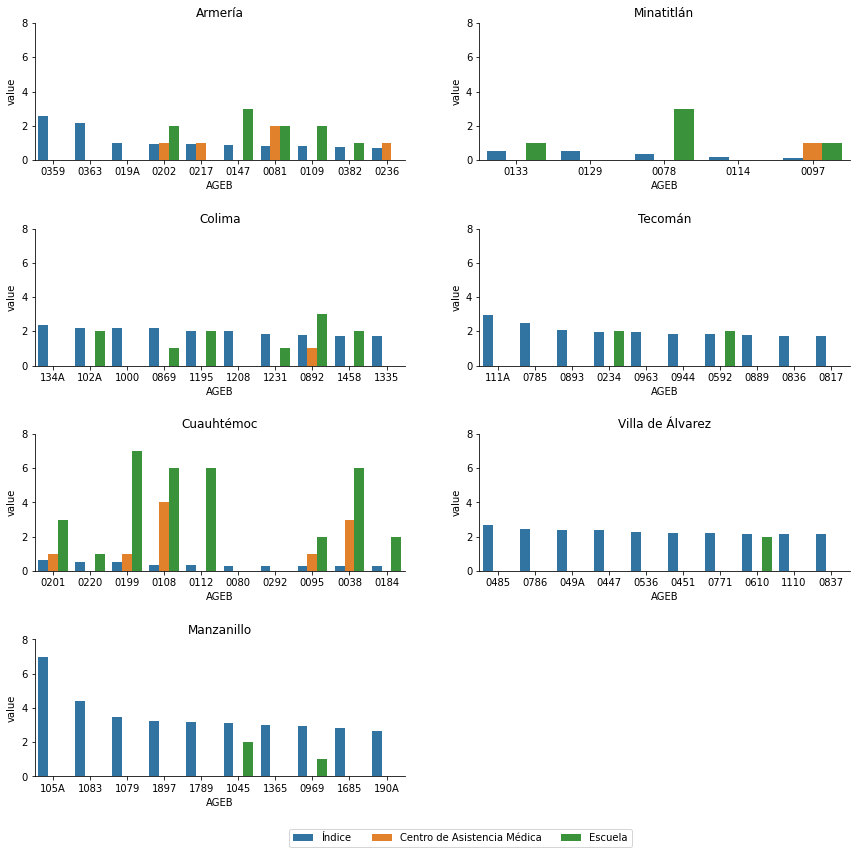

In [63]:
numMun = len(zonesContaminantes.NOM_MUN.unique())
nrows = 4
ncols = 2 

fig, ax = plt.subplots(nrows = nrows, ncols=ncols, figsize=(16,12))

i = 0
width = 0.4
for col in range(ncols):
  for row in range(nrows):

    try:
      df = zones[zones["NOM_MUN"] == listMuns[i]].copy()
    except:
      ax[-1, -1].axis('off')
      break
    df.sort_values("factor", ascending=False, inplace=True)
    
    df = df.head(10)
    #df["Índice"] = df["factor"] * np.max(df[["Centro de Asistencia Médica","Escuela"]]).max() / df["factor"].max()
    zonesBarplot = df.melt(id_vars="AGEB", value_vars=["Índice","Centro de Asistencia Médica","Escuela"])

    width_scale = 0.33

    # ax principal
    ax[row,col].set(
        title=listMuns[i],
        ylim=(0,8)
    )


    sns.barplot(
        x = "AGEB",
        y = "value", 
        data = zonesBarplot, 
        ax = ax[row,col],
        hue = "variable"
        )
    
    sns.despine()
    if row == 3 and col == 0:
      print(listMuns[i],row,col)
      ax[row,col].legend(
          bbox_to_anchor=(1.15, -0.55),
          loc="lower center",
          ncol=3,
          fancybox=True
      )
    else:
      ax[row,col].legend([],[], frameon=False)
    i+=1

    
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.subplots_adjust(
    #left=0.1,
    #bottom=0.1,
    #right=0.9,
    #top=0.9,
    wspace=0.2,
    hspace=0.5)

#plt.savefig("img/indice.png",dpi=300)
plt.show()

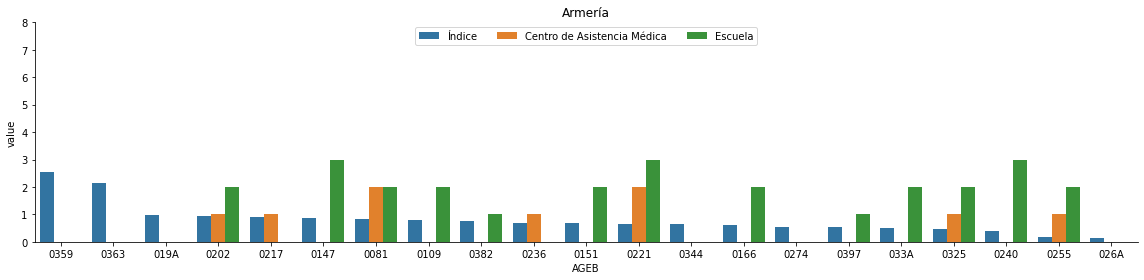

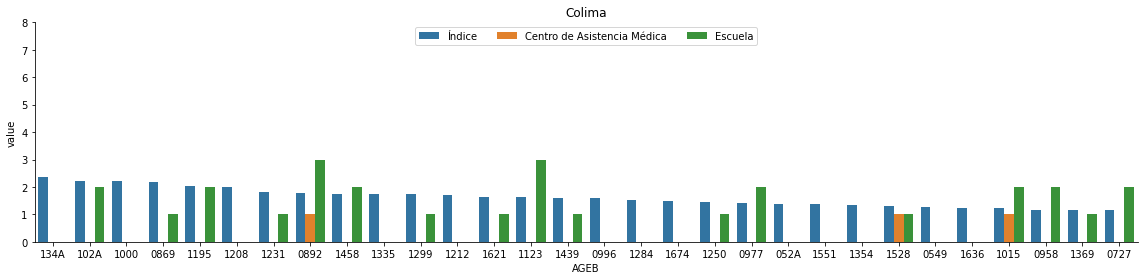

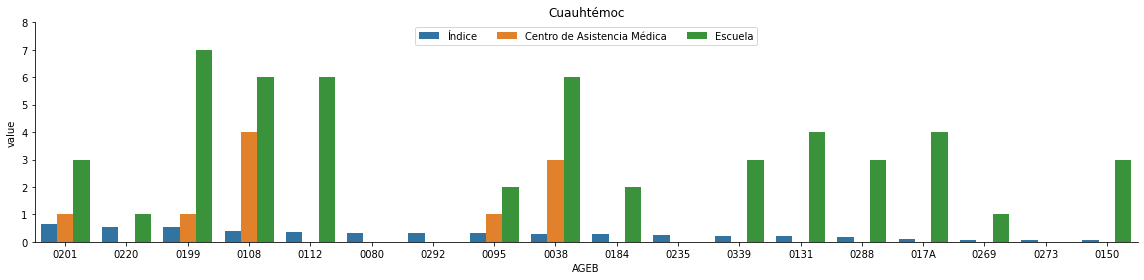

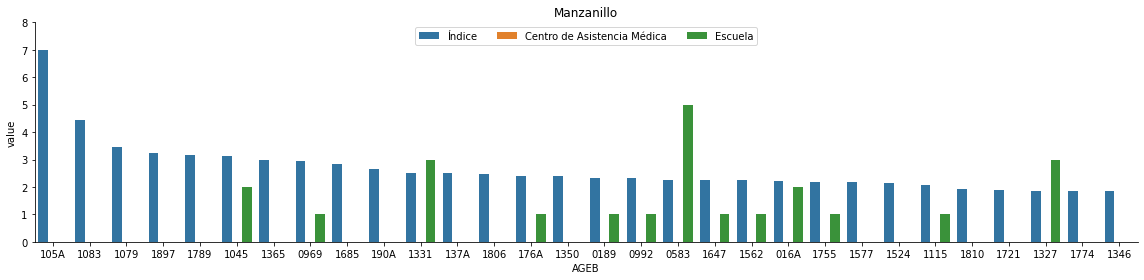

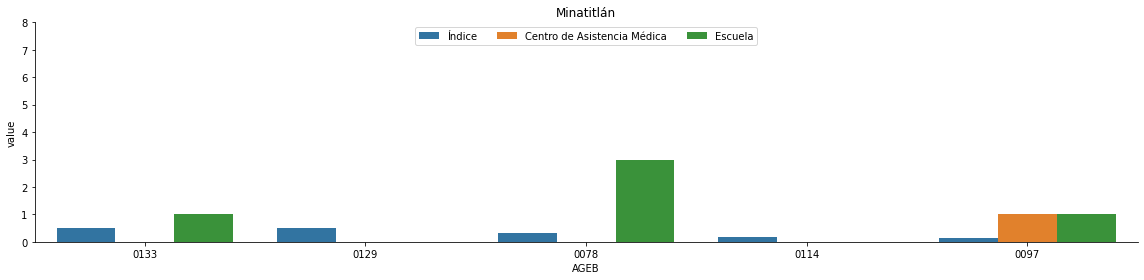

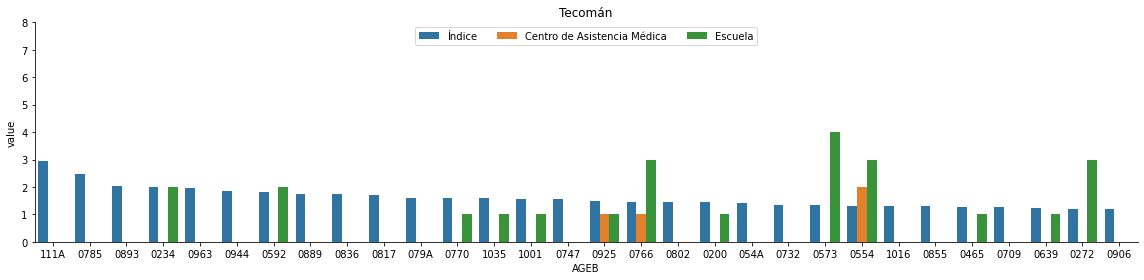

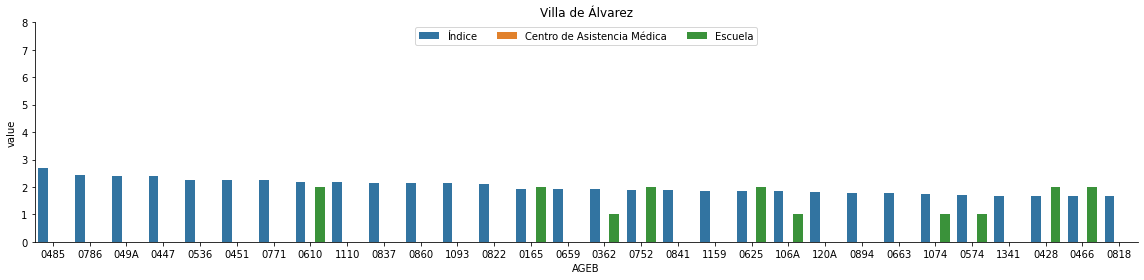

In [64]:
numMun = len(zonesContaminantes.NOM_MUN.unique())
nrows = 4
ncols = 2 



i = 0
width = 0.4
for i in range(len(listMuns)):
  df = zones[zones["NOM_MUN"] == listMuns[i]].copy()
  fig, ax = plt.subplots(figsize=(16,4))
  df.sort_values("factor", ascending=False, inplace=True)
  
  df = df.head(30)
  #df["Índice"] = df["factor"] * np.max(df[["Centro de Asistencia Médica","Escuela"]]).max() / df["factor"].max()
  zonesBarplot = df.melt(id_vars="AGEB", value_vars=["Índice","Centro de Asistencia Médica","Escuela"])
  width_scale = 0.33
  # ax principal
  ax.set(
      title=listMuns[i],
      ylim=(0,8)
  )
  sns.barplot(
      x = "AGEB",
      y = "value", 
      data = zonesBarplot, 
      ax = ax,
      hue = "variable"
      )
  
  sns.despine()
  
  ax.legend(
    #bbox_to_anchor=(0.5, -0.60),
    loc="upper center",
    ncol=3,
    fancybox=True
  )

  plt.tight_layout(
      #rect=[0, 0, 0.75, 1]
      )
  plt.savefig(f"img/indice_{listMuns[i]}.png",dpi=300)
  plt.show()


## Mapa general por Mun

In [65]:
zonesContaminantes.head()

,AGEB,ENT,LOC,MUN,CO,HCHO,NO2,O3,S02,acumulado,...,OVSINT,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020,geometry,area,densidad,factor
0,105A,6,1,7,0.813755,0.510085,0.933331,0.896253,0.788130,3.941553,...,28.311688,3.051948,13.961039,123.857370,Muy bajo,0.967527,"POLYGON ((2258770.382 790066.946, 2258731.273 ...",4.807400,320.547497,1263.455015
1,1083,6,1,7,0.879264,0.503594,0.829189,0.874525,0.709164,3.795735,...,12.582781,0.000000,1.986755,126.769859,Muy bajo,0.990279,"POLYGON ((2257677.422 792101.832, 2257660.132 ...",0.717090,210.573151,799.279913
2,1079,6,1,7,0.831056,0.457837,0.888858,0.889368,0.727309,3.794428,...,19.768992,4.264771,16.170591,122.770207,Bajo,0.959035,"POLYGON ((2258235.578 791582.658, 2258251.501 ...",13.797391,164.233953,623.173855
3,1897,6,1,7,0.697028,0.395680,0.397744,0.808557,0.718387,3.017397,...,68.115688,3.470640,15.092025,121.856029,Bajo,0.951894,"POLYGON ((2253757.730 799437.112, 2253757.073 ...",29.608992,192.677952,581.385894
4,1789,6,1,7,0.715762,0.350921,0.411010,0.805129,0.613468,2.896290,...,72.497966,1.627339,15.303215,121.246173,Bajo,0.947130,"POLYGON ((2253624.455 799134.829, 2253626.151 ...",12.437947,198.023037,573.532107


In [66]:
zonesContaminantesProj = zonesContaminantes.to_crs("EPSG:4326")
zonesContaminantesProj.head()

,AGEB,ENT,LOC,MUN,CO,HCHO,NO2,O3,S02,acumulado,...,OVSINT,OVSCEL,OVHAC,IM_2020,GM_2020,IMN_2020,geometry,area,densidad,factor
0,105A,6,1,7,0.813755,0.510085,0.933331,0.896253,0.788130,3.941553,...,28.311688,3.051948,13.961039,123.857370,Muy bajo,0.967527,"POLYGON ((-104.29808 19.08908, -104.29846 19.0...",4.807400,320.547497,1263.455015
1,1083,6,1,7,0.879264,0.503594,0.829189,0.874525,0.709164,3.795735,...,12.582781,0.000000,1.986755,126.769859,Muy bajo,0.990279,"POLYGON ((-104.30880 19.10735, -104.30896 19.1...",0.717090,210.573151,799.279913
2,1079,6,1,7,0.831056,0.457837,0.888858,0.889368,0.727309,3.794428,...,19.768992,4.264771,16.170591,122.770207,Bajo,0.959035,"POLYGON ((-104.30340 19.10273, -104.30325 19.1...",13.797391,164.233953,623.173855
3,1897,6,1,7,0.697028,0.395680,0.397744,0.808557,0.718387,3.017397,...,68.115688,3.470640,15.092025,121.856029,Bajo,0.951894,"POLYGON ((-104.34728 19.17320, -104.34728 19.1...",29.608992,192.677952,581.385894
4,1789,6,1,7,0.715762,0.350921,0.411010,0.805129,0.613468,2.896290,...,72.497966,1.627339,15.303215,121.246173,Bajo,0.947130,"POLYGON ((-104.34851 19.17044, -104.34849 19.1...",12.437947,198.023037,573.532107


In [67]:
zonesContaminantesProj.to_excel("zonesContaminantesProj.xlsx")

In [68]:
dicMuns = {
    1  :  'Armería',
    2  :  'Colima-Villa de Álvarez',
    3  :  'Comala',
    4  :  'Coquimatlán',
    5  :  'Cuauhtémoc',
    6  :  'Ixtlahuacán',
    7  :  'Manzanillo',
    8  :  'Minatitlán',
    9  :  'Tecomán' ,
}

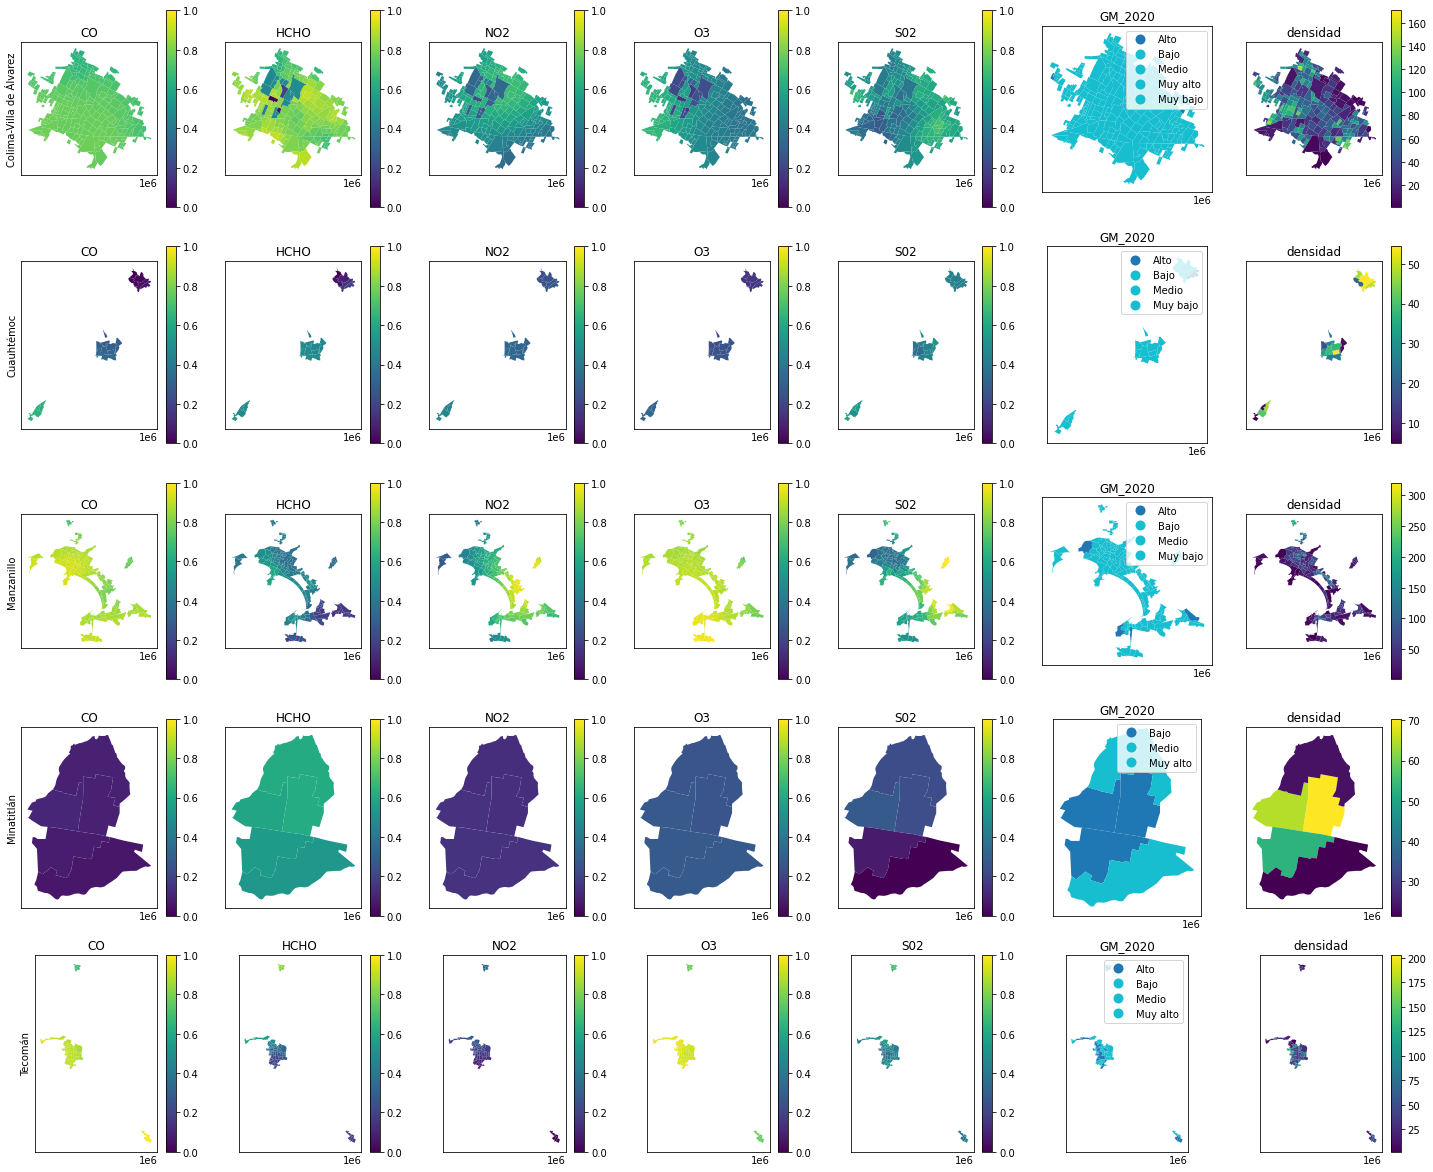

In [69]:
columns = ['CO', 'HCHO', 'NO2', 'O3', 'S02', 'GM_2020','densidad']
municipios =  [2,  5 ,7 ,8,  9]
nrows = len(municipios)
ncols = len(columns)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows*5, ncols*3))


for row in range(nrows):
  mun = zonesContaminantes[zonesContaminantes['MUN'] == municipios[row]]
  if municipios[row] == 2:
    mun = zonesContaminantes[zonesContaminantes['MUN'].isin([2,10])]

  for col in range(ncols):

    if col == 0:
      ax[row,col].set_ylabel(dicMuns[municipios[row]])
    
    if col > 5:
      mun.plot(ax=ax[row,col], column=columns[col], legend=True)
    else:
      mun.plot(ax=ax[row,col], column=columns[col], legend=True, vmin=0, vmax=1)
    ax[row,col].set_title(columns[col])
    ax[row,col].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

    